In [159]:
## Pyber ##

# import dependencies here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [160]:
# fetch city data
city_data_pd = pd.read_csv('raw_data/city_data.csv')
city_data_pd.head()

,city,driver_count,type
0,Tammyburgh,11,Urban
1,Melissaborough,15,Urban
2,Port Brianborough,62,Urban
3,New Katherine,68,Urban
4,Lake Charlesside,65,Urban


In [161]:
# fetch ride data
ride_data_pd = pd.read_csv('raw_data/ride_data.csv')
ride_data_pd.head()

,city,date,fare,ride_id
0,Karenfurt,2017-01-01 19:03:03,32.90,3383346995405
1,Melissaborough,2017-01-01 08:55:58,19.59,2791839504576
2,Port Sandraport,2017-01-01 16:21:54,31.04,3341437383289
3,Curtismouth,2017-01-03 06:36:53,15.12,6557246300691
4,Port Michael,2017-01-03 09:56:52,19.65,9887635746234


In [162]:
# merge city and ride data
city_ride_pd = city_data_pd.merge(ride_data_pd, on='city')
city_ride_pd.head()

,city,driver_count,type,date,fare,ride_id
0,Tammyburgh,11,Urban,2017-01-02 10:56:28,12.40,7963408790849
1,Tammyburgh,11,Urban,2017-01-02 04:28:03,18.78,2315208159060
2,Tammyburgh,11,Urban,2017-01-03 03:00:08,30.10,558639764959
3,Tammyburgh,11,Urban,2017-01-01 00:10:21,7.76,9113511454178
4,Tammyburgh,11,Urban,2017-01-02 05:22:44,22.00,4171010688543


In [163]:
# average fare per city
avg_fare_per_city = ride_data_pd.groupby('city', as_index=False)['fare'].mean()
avg_fare_per_city = avg_fare_per_city.rename(columns={'fare':'average fare'})
avg_fare_per_city.head()

,city,average fare
0,Adamschester,29.594444
1,Alexisfort,27.366970
2,Amberberg,28.624375
3,Anthonyfurt,29.491176
4,Boyleberg,32.396000


In [164]:
# total rides per city
total_rides_per_city = ride_data_pd.groupby('city', as_index=False)['ride_id'].count()
total_rides_per_city = total_rides_per_city.rename(columns={'ride_id': 'total rides per city'})
total_rides_per_city.head()

,city,total rides per city
0,Adamschester,9
1,Alexisfort,33
2,Amberberg,16
3,Anthonyfurt,17
4,Boyleberg,5


In [165]:
# total drivers per city
total_drivers_per_city = city_data_pd[['city', 'driver_count']]
total_drivers_per_city.head()

,city,driver_count
0,Tammyburgh,11
1,Melissaborough,15
2,Port Brianborough,62
3,New Katherine,68
4,Lake Charlesside,65


In [166]:
# city type
city_type = city_data_pd[['city', 'type']]
city_type.head()

,city,type
0,Tammyburgh,Urban
1,Melissaborough,Urban
2,Port Brianborough,Urban
3,New Katherine,Urban
4,Lake Charlesside,Urban


In [167]:
city_ride_summary = pd.merge(avg_fare_per_city, total_rides_per_city, on='city')
city_ride_summary = city_ride_summary.merge(total_drivers_per_city, on='city')
city_ride_summary = city_ride_summary.merge(city_type, on='city')
city_ride_summary.head()

,city,average fare,total rides per city,driver_count,type
0,Adamschester,29.594444,9,27,Suburban
1,Alexisfort,27.366970,33,24,Urban
2,Amberberg,28.624375,16,13,Suburban
3,Anthonyfurt,29.491176,17,17,Suburban
4,Boyleberg,32.396000,5,13,Suburban


In [168]:
urban_summary = city_ride_summary[city_ride_summary['type'] == 'Urban']
urban_summary.head()

,city,average fare,total rides per city,driver_count,type
1,Alexisfort,27.366970,33,24,Urban
5,Brianfurt,24.506818,22,4,Urban
7,Catherinebury,27.307931,29,7,Urban
8,Curtismouth,25.051935,31,40,Urban
13,East James,26.550714,28,49,Urban


In [169]:
suburban_summary = city_ride_summary[city_ride_summary['type'] == 'Suburban']
suburban_summary.head()

,city,average fare,total rides per city,driver_count,type
0,Adamschester,29.594444,9,27,Suburban
2,Amberberg,28.624375,16,13,Suburban
3,Anthonyfurt,29.491176,17,17,Suburban
4,Boyleberg,32.396000,5,13,Suburban
9,Davidbury,30.834000,20,13,Suburban


In [170]:
rural_summary = city_ride_summary[city_ride_summary['type'] == 'Rural']
rural_summary.head()

,city,average fare,total rides per city,driver_count,type
6,Campbellmouth,34.177500,8,2,Rural
10,Davidsonfurt,32.085000,2,1,Rural
26,Hoganfort,30.985455,11,5,Rural
32,Joshuaview,37.829091,11,1,Rural
40,Lake Joshuaburgh,42.265714,7,8,Rural


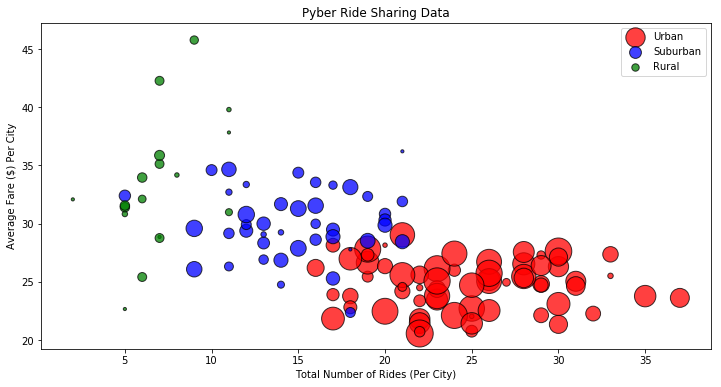

In [171]:
# Plot Urban City/Rides summary
plt.figure(figsize=(12,6))
plt.scatter(x = urban_summary['total rides per city'],
            y = urban_summary['average fare'],
            s = urban_summary['driver_count'] * 10,
            c = 'red',
            marker="o", edgecolors="black",
            label = "Urban",
            alpha = 0.75)

# Plot Suburban City/Rides summary
plt.scatter(x = suburban_summary['total rides per city'],
            y = suburban_summary['average fare'],
            s = suburban_summary['driver_count'] * 10,
            c = 'blue',
            marker="o", edgecolors="black",
            label = "Suburban",
            alpha = 0.75)

# Plot Rural City/Rides summary
plt.scatter(x = rural_summary['total rides per city'],
            y = rural_summary['average fare'],
            s = rural_summary['driver_count'] * 10,
            c = 'green',
            marker="o", edgecolors="black",
            label = "Rural",
            alpha = 0.75)

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($) Per City")
plt.title("Pyber Ride Sharing Data")
plt.legend(loc='best')
plt.figure(figsize=(5,5))
plt.show()

In [172]:
city_type_fares = city_ride_pd.groupby('type', as_index=False)['fare'].sum()
total_fare = city_type_fares['fare'].sum()

# calculate % of Total Fares by City Type
city_type_fares['fare'] = city_type_fares['fare'] / total_fare * 100
city_type_fares

,type,fare
0,Rural,6.764976
1,Suburban,29.740277
2,Urban,63.494747


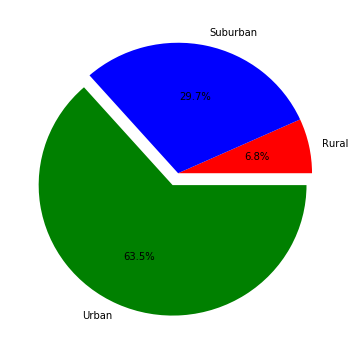

In [173]:
# plot pie chart of % of Total Fares by City Type
colors = ['Red', 'Blue', 'Green']
explode = [0,0,0.1]
plt.figure(figsize=(6,6))
plt.pie(city_type_fares['fare'], colors=colors, explode=explode, autopct="%1.1f%%", labels=city_type_fares['type'])
plt.show()

In [174]:
# Calculate % of Total Rides by City Type
city_type_rides = city_ride_pd.groupby('type', as_index=False)['ride_id'].count()
total_rides = city_type_rides['ride_id'].sum()

# calculate % of Total Fares by City Type
city_type_rides['ride_id'] = city_type_rides['ride_id'] / total_rides * 100
city_type_rides = city_type_rides.rename(columns={'ride_id': 'total_ries_per_city_type'})
city_type_rides

,type,total_ries_per_city_type
0,Rural,5.263158
1,Suburban,26.315789
2,Urban,68.421053


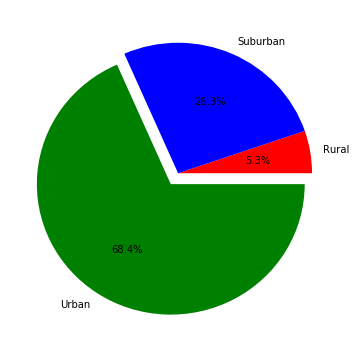

In [175]:
# plot pie chart of % of Total Rides by City Type
colors = ['Red', 'Blue', 'Green']
explode = [0,0,0.1]
plt.figure(figsize=(6,6))
plt.pie(city_type_rides['total_ries_per_city_type'], colors=colors, explode=explode, autopct="%1.1f%%", labels=city_type_rides['type'])
plt.show()

In [176]:
# calculate % of Total Drivers by City Type
city_type_drivers = city_ride_pd.groupby('type', as_index=False)['driver_count'].sum()
total_drivers = city_type_drivers['driver_count'].sum()

# calculate % of Total Drivers by City Type
city_type_drivers['driver_count'] = city_type_drivers['driver_count'] / total_drivers * 100
city_type_drivers

,type,driver_count
0,Rural,0.940728
1,Suburban,12.468204
2,Urban,86.591067


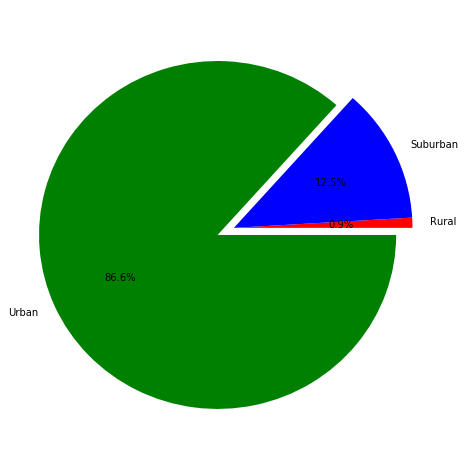

In [177]:
# plot pie chart of % of Total Drivers by City Type
colors = ['Red', 'Blue', 'Green']
explode = [0,0,0.1]
plt.figure(figsize=(8,8))
plt.pie(city_type_drivers['driver_count'], colors=colors, explode=explode, autopct="%1.1f%%", labels=city_type_drivers['type'])
plt.show()